In [1]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
from time import mktime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('raw_data.csv', parse_dates=[2])
df_clean = df[['location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita']]
df_clean

,location,date,total_cases,total_deaths,gdp_per_capita
0,Afghanistan,2019-12-31,0.0,0.0,1803.987
1,Afghanistan,2020-01-01,0.0,0.0,1803.987
2,Afghanistan,2020-01-02,0.0,0.0,1803.987
3,Afghanistan,2020-01-03,0.0,0.0,1803.987
4,Afghanistan,2020-01-04,0.0,0.0,1803.987
...,...,...,...,...,...
50413,Zimbabwe,2020-10-15,8055.0,231.0,1899.775
50414,Zimbabwe,2020-10-16,8075.0,231.0,1899.775
50415,Zimbabwe,2020-10-17,8099.0,231.0,1899.775
50416,Zimbabwe,2020-10-18,8110.0,231.0,1899.775


In [3]:
#como no todos los paises tienen la misma cantidad de valores creo un nuevo dataframe solo con aquellos
#que tienen 294 valores que es lo maximo, encontrado con df_clean['location'].value_counts()

df2= df_clean[df_clean['location'].apply(lambda x: True if df_clean['location'].value_counts()[x]==294 else False)]

In [4]:
df2['location'].value_counts().tail(20)
#quedaron solo 63 paises para analizar

China             294
Croatia           294
Czech Republic    294
Denmark           294
Ecuador           294
Israel            294
Egypt             294
Estonia           294
Finland           294
France            294
Georgia           294
Germany           294
Greece            294
Iceland           294
India             294
Indonesia         294
Iran              294
Iraq              294
Ireland           294
Vietnam           294
Name: location, dtype: int64

In [5]:
#seleccion del pais y el rango de fechas a analizar

pais = input('¿Que pais desea ver?').capitalize()
desde = time.strptime(input('¿Desde que fecha desea ver? (AAAA-MM-DD) min= 2019-12-31'), '%Y-%m-%d')
hasta =  time.strptime(input('¿Hasta que fecha desea ver? (AAAA-MM-DD), max= 2020-10-19'), '%Y-%m-%d')

desde = datetime.fromtimestamp(mktime(desde))
hasta = datetime.fromtimestamp(mktime(hasta))


df_clean2= df2[df2['location']==pais]
df_clean2= df_clean2.loc[(df_clean2['date']>=desde) & (df_clean2['date']<=hasta)]
df_clean2=df_clean2.fillna(0).reset_index()

Text(0.5, 0.98, 'Curva de casos y muertes en Italy')

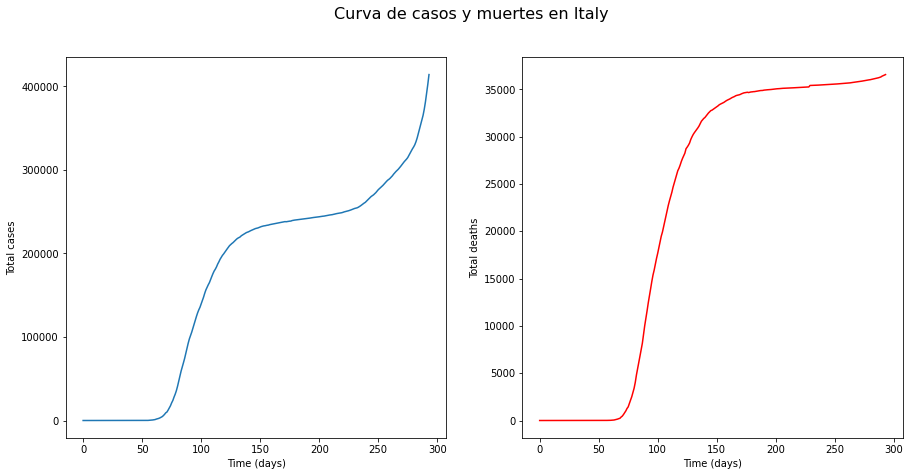

In [7]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
axs[0].plot(df_clean2['total_cases'])
axs[1].plot(df_clean2['total_deaths'], color='red')

axs[0].set_ylabel('Total cases')
axs[1].set_ylabel('Total deaths')

axs[0].set_xlabel('Time (days)')
axs[1].set_xlabel('Time (days)')

fig.suptitle('Curva de casos y muertes en {}'.format(pais), fontsize=16)

Text(0.5, 0, 'Time (days)')

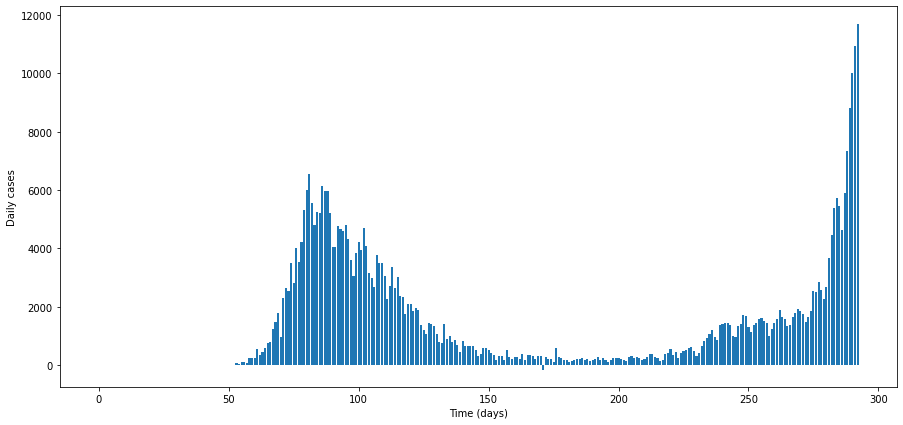

In [8]:
#estimacion de la derivada para los casos y- (y-1)

dc = pd.Series(df_clean2['total_cases'].apply(lambda x: int(x)))[1:].reset_index()['total_cases']
dc1 = pd.Series(df_clean2['total_cases'].apply(lambda x: int(x)))[:-1].reset_index()['total_cases']

df_clean2['d_cases']= dc-dc1


fig, ax = plt.subplots(figsize=(15,7))
ax.bar(x=range(len(df_clean2['date'])), height=df_clean2['d_cases']) #daily cases
ax.set_ylabel('Daily cases')
ax.set_xlabel('Time (days)')

Text(0.5, 0, 'Time (days)')

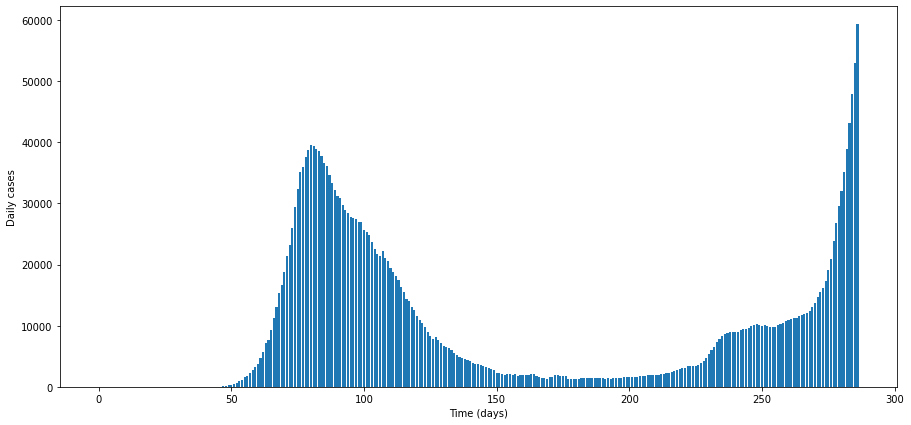

In [9]:
#casos en base semanal
dc = pd.Series(df_clean2['total_cases'].apply(lambda x: int(x)))[7:].reset_index()['total_cases']
dc1 = pd.Series(df_clean2['total_cases'].apply(lambda x: int(x)))[:-1].reset_index()['total_cases']

df_clean2['d_cases']= dc-dc1


fig, ax = plt.subplots(figsize=(15,7))
ax.bar(x=range(len(df_clean2['date'])), height=df_clean2['d_cases']) #daily cases
ax.set_ylabel('Daily cases')
ax.set_xlabel('Time (days)')

Text(0.5, 0, 'Time (days)')

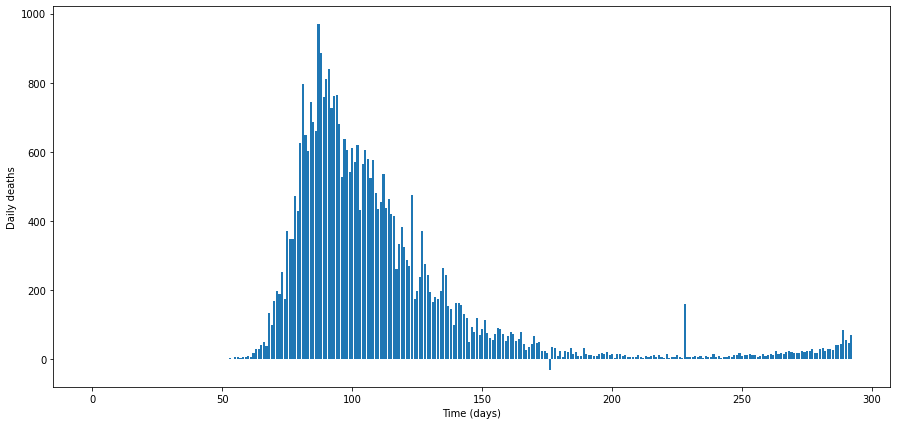

In [10]:
#estimacion de la derivada para las muertes y- (y-1)

dc = df_clean2['total_deaths'][1:].reset_index()['total_deaths']
dc1 = df_clean2['total_deaths'][:-1].reset_index()['total_deaths']

df_clean2['d_deaths']=dc-dc1

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(x=range(len(df_clean2['date'])), height=df_clean2['d_deaths']) #daily deaths
ax.set_ylabel('Daily deaths')
ax.set_xlabel('Time (days)')

Text(0.5, 0, 'Time (days)')

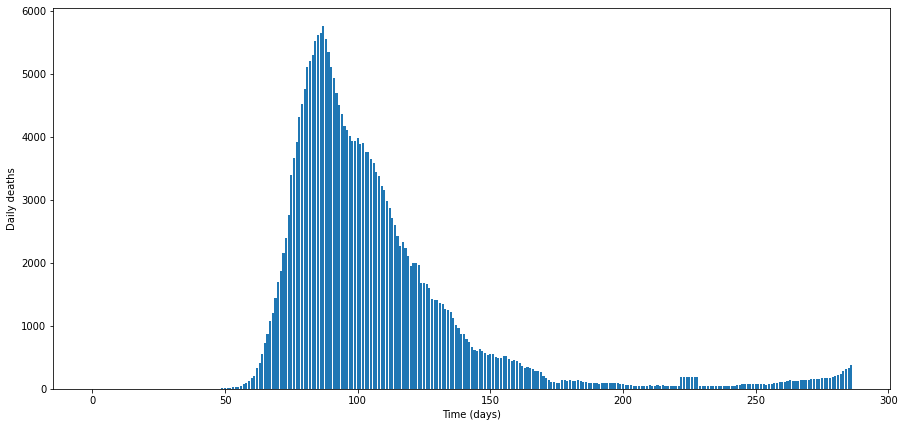

In [11]:
# muertes en base semanal

dc = df_clean2['total_deaths'][7:].reset_index()['total_deaths']
dc1 = df_clean2['total_deaths'][:-1].reset_index()['total_deaths']

df_clean2['d_deaths']=dc-dc1

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(x=range(len(df_clean2['date'])), height=df_clean2['d_deaths']) #daily deaths
ax.set_ylabel('Daily deaths')
ax.set_xlabel('Time (days)')
